<a href="https://colab.research.google.com/github/feuziq47/DL/blob/master/cat_and_dog_by_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# VGG16 feature extraction을 이용한 overfitting 극복

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!nvidia-smi

Wed Jul 24 09:58:59 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    26W /  70W |  11460MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import os
import matplotlib.pyplot as plt

In [0]:
base_dir = '/content/drive/My Drive/DeepLearn/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [0]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30


In [0]:
conv_base.trainable = False

In [0]:
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 366 images belonging to 2 classes.
Found 340 images belonging to 2 classes.
Epoch 1/30
100/100 - 22s - loss: 0.6311 - acc: 0.6420 - val_loss: 0.4634 - val_acc: 0.8090
Epoch 2/30
100/100 - 20s - loss: 0.4780 - acc: 0.7677 - val_loss: 0.3974 - val_acc: 0.8390
Epoch 3/30
100/100 - 20s - loss: 0.4043 - acc: 0.8269 - val_loss: 0.3565 - val_acc: 0.8550
Epoch 4/30
100/100 - 21s - loss: 0.3556 - acc: 0.8585 - val_loss: 0.3347 - val_acc: 0.8610
Epoch 5/30
100/100 - 20s - loss: 0.3324 - acc: 0.8680 - val_loss: 0.3623 - val_acc: 0.8440
Epoch 6/30
100/100 - 20s - loss: 0.3072 - acc: 0.8683 - val_loss: 0.3188 - val_acc: 0.8710
Epoch 7/30
100/100 - 20s - loss: 0.2812 - acc: 0.8873 - val_loss: 0.3604 - val_acc: 0.8530
Epoch 8/30
100/100 - 21s - loss: 0.2677 - acc: 0.8974 - val_loss: 0.3280 - val_acc: 0.8690
Epoch 9/30
100/100 - 19s - loss: 0.2478 - acc: 0.9104 - val_loss: 0.3235 - val_acc: 0.8760
Epoch 10/30
100/100 - 19s - loss: 0.2409 - acc: 0.9087 - val_loss: 0.3157 - val_acc: 0.8820
Epoch 1

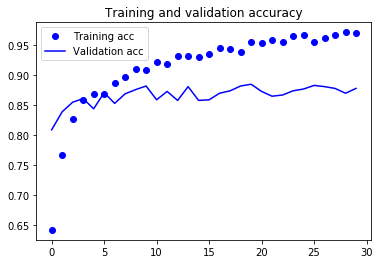

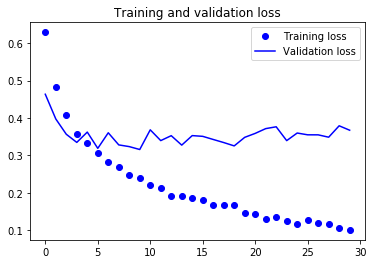

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.save('cats_and_dogs_small_by_VGG.h5')